In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
sns.set()
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
raw_data = pd.read_csv('downloads/houses_to_rent_v3.csv')
raw_data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [4]:
df = raw_data.copy()

df

df.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [6]:
y = df['total (R$)']
x = df['area']
y = np.log(y)
y = y.values.reshape(-1,1)

x = x.values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

train_test_split(y, shuffle=False)

regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

print('Coefficients: \n', regr.coef_)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[0.00020519]]
Mean squared error: 0.59
Coefficient of determination: 0.04


Text(0.5, 1.0, 'Residual plot')

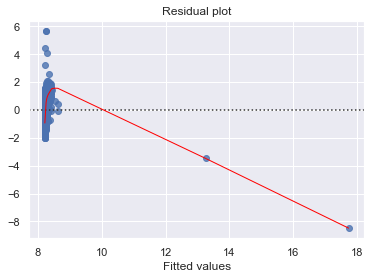

In [7]:
predictions = regr.predict(x_train)
predictions

sns.residplot(predictions.reshape(-1),y_train, data=df,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')


In [8]:
residuals = y_test - y_pred
print(residuals)

[[-1924.81679003]
 [-2932.36249127]
 [-2647.36249127]
 ...
 [-2784.19885811]
 [ 1380.42953117]
 [-3517.21454414]]


In [16]:
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     28.76
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           8.36e-08
Time:                        17:15:04   Log-Likelihood:            -1.1898e+05
No. Observations:               10692   AIC:                         2.380e+05
Df Residuals:                   10690   BIC:                         2.380e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5253.2188    165.250     31.790      0.000    4929.299    5577.139
x1             1.5901      0.296      5.363      0.000       1.009       2.171
==============================================================================
Omnibus:                    35727.629   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6940398922.588
Skew:                          59.179   Prob(JB):                         0.00
Kurtosis:                    3948.236   Cond. No.                         578.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

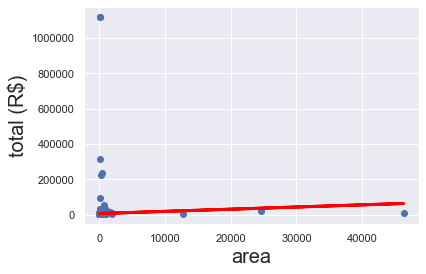

In [17]:
plt.scatter(df['area'],df['total (R$)'])
yhat = regr.coef_ * x + regr.intercept_
fig = plt.plot(x,yhat, lw=3, c='red', label ='regression line')
plt.xlabel('area', fontsize = 20)
plt.ylabel('total (R$)', fontsize = 20)
plt.show()

In [18]:
q_low = df['total (R$)'].quantile(0.01)
q_hi  = df['total (R$)'].quantile(0.99) 

df_filtered = df[(df['total (R$)'] < q_hi) & (df['total (R$)'] > q_low)]

In [19]:
q1_low = df['area'].quantile(0.01)
q1_hi = df['area'].quantile(0.99)

df_filtered1 = df[(df['area'] < q1_hi) & (df['area'] > q1_low)]

In [20]:
df_filtered2 = df_filtered + df_filtered1

In [24]:
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     28.76
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           8.36e-08
Time:                        17:15:33   Log-Likelihood:            -1.1898e+05
No. Observations:               10692   AIC:                         2.380e+05
Df Residuals:                   10690   BIC:                         2.380e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5253.2188    165.250     31.790      0.000    4929.299    5577.139
x1             1.5901      0.296      5.363      0.000       1.009       2.171
==============================================================================
Omnibus:                    35727.629   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6940398922.588
Skew:                          59.179   Prob(JB):                         0.00
Kurtosis:                    3948.236   Cond. No.                         578.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

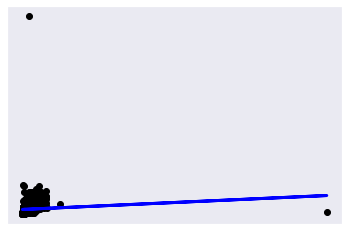

In [25]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()